In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor
from keras import models
from keras import layers
from keras import optimizers
from scipy.integrate import odeint
import scipy
import pandas as pd

In [4]:
#Type IA supernova
url="https://raw.githubusercontent.com/JuanDDiosRojas/Arts/main/Deep%20Learning%20and%20its%20applications%20to%20cosmology/supernovas.txt"

### Gradient descent
This algorithm is based in the finite difference method.

In [14]:
# 1.Compute the k partial derivative, of a function g(x_1, x_2,...,x_k,...).
def partial(g, k, X):
    h = 1e-10
    Y = np.copy(X)
    X[k - 1] = X[k - 1] + h
    dp = (g(X) - g(Y)) / h
    return dp

# 2.Constructs the gradient vector of a function f evaluating in X, has a bound (cota) to avoid exploding 
#the magnitude of the gradient, but keeping its direction. 
def gradcot(f, X, cota):
    grd = []
    for i in np.arange(0, len(X)):
        ai = partial(f, i + 1, X)
        ai=float(ai)
        if ai<0:
            ai = max(ai, -1*cota)
        else:
            ai = min(ai, cota)
        grd.append(ai)
    return grd

# 3.Performs the iterations of the gradient descent and returns the value X0 for which f reaches its minimum.
#a maximum number of interactions (steps) can be set. An acceptably small magnitude for the gradient as well (tolerance).
#eta its the learning rate of the process and X0 the initial point.
def desgrad(f,X0,eta, steps, cota, tolerance):
    i=0
    while True:
        i=i+1
        X0=X0-eta*np.array(gradcot(f,X0, cota))
        if np.linalg.norm(gradcot(f,X0, cota))<tolerance or i>steps: break  
    return X0


### Modeling the Hubble’s law with a perceptron
This is a dataset of 36 IA supernovas, for which the Hubble relation is found to work well. Although Hubble's law should have an ordinate to the origin of 0, we will fit a straight line $v=rH_0 + b$ with the help of the perceptron.


In [7]:
s=pd.read_csv(url,sep='\s+')
s

,Supernova,Velocidad,Distancia[Mpc],H_0,Sigma
0,SN1990O,9065,134.7,67.3,2.3
1,SN1990T,12012,158.9,75.6,3.1
2,SN1990af,15055,198.6,75.8,2.8
3,SN1991S,16687,238.9,69.8,2.8
4,SN1991U,9801,117.1,83.7,3.4
5,SN1991ag,4124,56.0,73.7,2.9
6,SN1992J,13707,183.9,74.5,3.1
7,SN1992P,7880,121.5,64.8,2.2
8,SN1992ae,22426,274.6,81.6,3.4
9,SN1992ag,7765,102.1,76.1,2.7


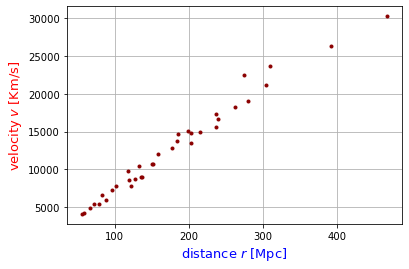

In [10]:
plt.plot(s['Distancia[Mpc]'],s['Velocidad'],'.', color='darkred')
plt.xlabel('distance $r$ [Mpc]',color='b',size=13)
plt.ylabel('velocity $v$ [Km/s]',color='r',size=13)
plt.grid()

In [11]:
#prepare the dataset, and assign a column of "1" to x, to be multiplied by the bias.
r=np.array(s['Distancia[Mpc]'])
v=np.array(s['Velocidad'])
x1=[]
x=r
for i in x:
    i=np.append(i,1.0)
    x1.append(i)
    
x1=np.array(x1)

In [12]:
#we apply the mean square error to the output of the perceptron, when processing the dataset.
def error(W,x=x1,y=v):
    s=0
    for i in range(0,len(y)):
        l=0.5*(y[i]-np.dot(x1[i],W))**2
        s=s+l
    return s

In [22]:
#evaluating in desgrad function
H0,b=desgrad(error,[1,500],eta=0.01,steps=1000,tolerance=1e-8,cota=100.0)
print('The Hubble constant is ',H0)
print('The bias is',b)

The Hubble constant is  68.00000020020342
The bias is 567.0000002002876


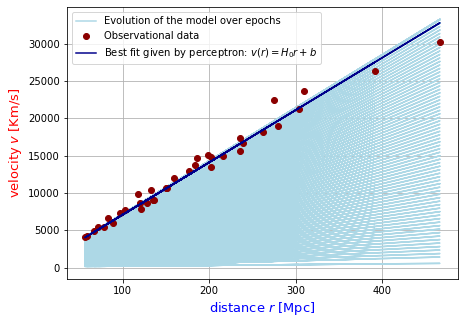

In [41]:
#now, we plot some steps made by learning process of the peerceptron
index=np.arange(2,90,1)
def desgrad1(f,X0,eta, steps, cota, tolerance):
    i=0
    pendientes=[]
    while True:
        i=i+1
        X0=X0-eta*np.array(gradcot(f,X0, cota))
        if np.linalg.norm(gradcot(f,X0, cota))<tolerance or i>steps: break
        if i in index:
            pendientes.append(X0)
    return pendientes

A=desgrad1(error,[1,1],eta=0.01,steps=100,tolerance=1e-8,cota=100.0)

plt.figure(figsize=(7,5))
for a in A:
    m,b=a
    plt.plot(r,m*r+b,color='lightblue')
m1,b1=A[-1]
plt.plot(r,1*r+b,color='lightblue', label='Evolution of the model over epochs')
plt.plot(r,v,'o',label='Observational data',color='darkred')
plt.plot(r,m1*r+b1,label='Best fit given by perceptron: $v(r)=H_0 r+b$',color='darkblue')
plt.xlabel('distance $r$ [Mpc]',color='b',size=13)
plt.ylabel('velocity $v$ [Km/s]',color='r',size=13)
plt.grid()
plt.legend()

# Deep neural networks

In [22]:
#common activation functions

# RELU
def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)

#IDENTIDAD
def iden(X):
    return X
def diden(X):
    return 1

#SIGMOIDE
def sigmoid(X):
    return 1/(1+np.exp(-X))
def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

#TANGENTE HIPORBÓLICA
def tanh(X):
    return np.tanh(X)
def dtanh(X):
    return 1-tanh(X)**2



In [23]:
#algorithm for splitting the dataset into training and validation 
def split(X,Y,porcent): #porcent must be between 0 and 1, it is the asigned porcent to the training dataset.
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    return X_learn,Y_learn,X_val,Y_val

In [24]:
#we define forward propagation for a single hidden layer network, 
#with activation function id(x) at the output layer.
def forward(X,W1,b1,W2,b2,activation):
    z1=np.dot(X,W1)+b1
    a1=activation(z1)
    z2=np.dot(a1,W2)+b2
    a2=z2
    return a2

#"activation" can be replaced for any activation function, like mencioned above

In [44]:
# MSE cost function
def error(C):
    m=len(C)
    e=(1/(2*m))*np.linalg.norm(C)**2
    return e

In [46]:
# we define the neural network or multi layer perceptron
def neuralnet(X,Y,nodes,split_porcent,learning_rate,epochs,activation,dactivation):
    #input, output shapes
    n_inputs=X.shape[1]
    n_output=Y.shape[1]
    
    #training and validation sets
    X_train,Y_train,X_val,Y_val = split(X,Y,split_porcent)
    
    #forward
    W1=np.random.randn(n_inputs,nodes)
    W2=np.random.randn(nodes,n_output)
    b1=np.random.randn(nodes)
    b2=np.random.randn(n_output)
    
    #épocas
    errors=[]
    validation=[]
    for i in range(epochs+1):
        #Forward
        z1=np.dot(X_train,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        
        #backpropagation
        delta2 = a2-Y_train
        delta1 = (delta2).dot(W2.T)*dactivation(z1)
        
        errors.append(error(delta2)) #guardamos el error de cada época

        W2 -= learning_rate * a1.T.dot(delta2)
        b2 -= learning_rate * (delta2).sum(axis=0)

        W1 -= learning_rate * X_train.T.dot(delta1)
        b1 -= learning_rate * (delta1).sum(axis=0)
        print("epoch %d, cost %f" %(int(i),error(delta2)))
        
        #Ahora validamos el modelo
        z1=np.dot(X_val,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        delta = a2-Y_val
        validation.append(error(delta))
        
    plt.plot(range(i+1),errors,color='darkcyan',label='Training')
    plt.plot(range(i+1),validation,color='darkred',label='Validation')
    plt.grid()
    plt.legend()
    return W1,b1,W2,b2

### Modeling Friedmann equation

In [4]:
#some simulated data of the friedmann equation and its associated error
url='https://raw.githubusercontent.com/JuanDDiosRojas/Arts/main/Deep%20Learning%20and%20its%20applications%20to%20cosmology/datos_simulados.csv'
Friedmann_data=pd.read_csv(url,header=None)
F_data=np.array(Friedmann_data)

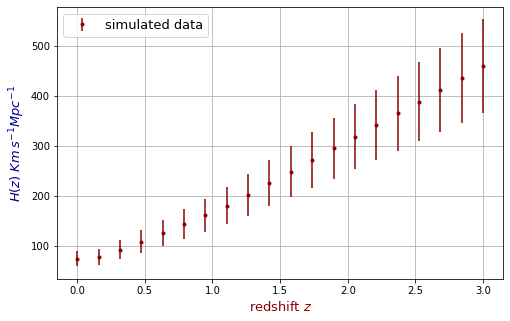

In [67]:
plt.figure(figsize=(8,5))
X=F_data[:,0]
Y=F_data[:,1]
t=np.linspace(0, 3, 20)
t=t.reshape(20,1)
#plt.plot(t,X)
plt.errorbar(t,X,yerr=Y ,ecolor='darkred', color='darkred',label='simulated data',fmt='.')
plt.xlabel('redshift $z$', color='darkred', size=13)
plt.ylabel('$H(z)$ $Km\,s^{-1}Mpc^{-1}$', color='darkblue', size=13)
plt.grid()
plt.legend(loc='upper left',fontsize=13)
#plt.savefig('fried1_data.pdf')

In [ ]:
#This ANN was trained with the folowing params
W1,b1,W2,b2=neuralnet(t,datos,nodes=100,split_porcent=0.65,learning_rate=0.0001,epochs=5000,activation=sigmoid,dactivation=dsigmoid)

Whit the error curves:
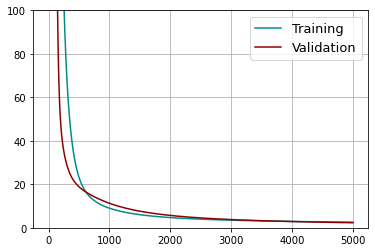

the parameters of this trained model were saved in the repository as "parametros_red.py". 
Here you can see the result of the training.

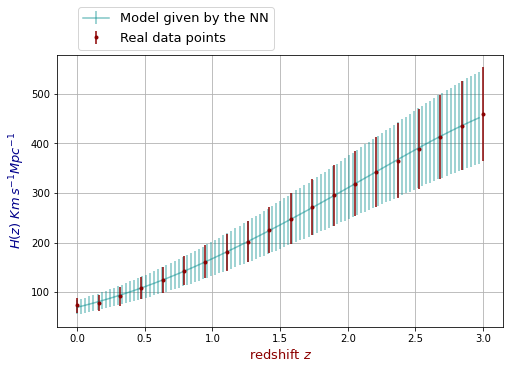

In [68]:
W1,b1,W2,b2=np.load('parametros_red.npy',allow_pickle=True)#params for this model

plt.figure(figsize=(8,5))
t0=np.arange(0,3,0.03)
t0=t0.reshape(len(t0),1)
A=forward(t0,W1,b1,W2,b2,sigmoid)
H_0=A[:,0]
err=A[:,1]
plt.errorbar(t0,H_0,yerr=err,fmt='-' ,ecolor='darkcyan', color='darkcyan',label='Model given by the NN',alpha = 0.5)
plt.errorbar(t,X,yerr=Y ,ecolor='darkred',fmt='.', color='darkred',label='Real data points')
plt.legend(bbox_to_anchor =(0.5,1.2),fontsize=13)
plt.xlabel('redshift $z$', color='darkred',size=13)
plt.ylabel('$H(z)$ $Km\,s^{-1}Mpc^{-1}$', color='darkblue',size=13)
plt.grid()
#plt.savefig('fried1_model.pdf')

### Second model for Friedmann equation

We start with the Friedmann equation in the newt form:
$$
\begin{equation}
    \frac{H^2}{H_0^2} = \Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3+ \Omega_{k,0}(1+z)^2 + \Omega_{\Lambda,0}.
    \label{eq:friedmann2}
\end{equation}
$$

Then, we generate different models by varying the initial parameters
$\Omega_{m,0}$ y $H_0$

and setting $\Omega_{r,0}=0$ 

Then equation becomes into:
$$
\begin{equation}
    \frac{H^2}{H_0^2} =\Omega_{m,0}(1+z)^3 + \Omega_{k,0}(1+z)^2 + \Omega_{\Lambda,0}
\end{equation}
$$

Then   $\Omega_{k,0}=1-\Omega_{m,0}- \Omega_{\Lambda,0}$


and $H_0 \in [0.66, 0.70]$

$\Omega_{m,0} \in [0.2, 0.5]$

$\Omega_{\Lambda}=0.7$


In [31]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import itertools

def friedmann(params):
    z=params[:,0]
    Om=params[:,1]
    H0=params[:,2]
    
    Ol=1-Om
    a=Om*(1+z)**3 + Ol
    return np.sqrt( H0**2 * a ) 

z=np.arange(0,3,0.1)
OM=np.arange(0.2,0.51,0.01)
H0=np.arange(0.66,0.71,0.01)

a=itertools.product(z,OM,H0)
X=np.array(list(a))
Y=friedmann(X)
Y=Y.reshape(len(Y),1)

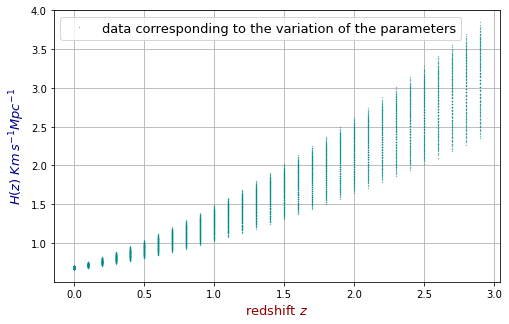

In [58]:
plt.figure(figsize=(8,5))
plt.plot(X[:,0],Y,'.',markersize=0.5, color='darkcyan', label='data corresponding to the variation of the parameters')
plt.legend(loc='upper left',fontsize=13)
plt.xlabel('redshift $z$', color='darkred',size=13)
plt.ylabel('$H(z)$ $Km\,s^{-1}Mpc^{-1}$', color='darkblue',size=13)
plt.grid()
#plt.savefig('fried2_data.pdf')

In [ ]:
#MLP training hyperparams
W1,b1,W2,b2=neuralnet(X,Y,nodes=25,split_porcent=0.8,learning_rate=0.0001,epochs=1000,activation=sigmoid,dactivation=dsigmoid)

with the error curves
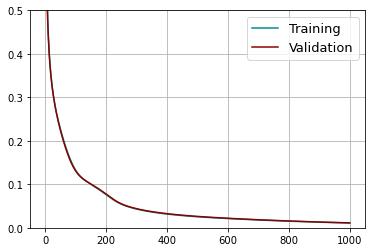

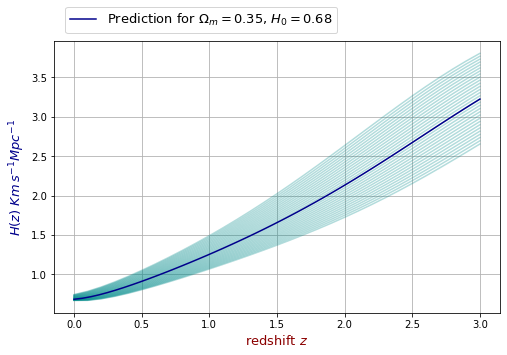

In [75]:
W1,b1,W2,b2=np.load('parametros_friedmann1.npy',allow_pickle=True)

z0=np.linspace(0,3,50) #Fijamos el dominio en z
omega_m=0.35
H_0=0.68
dom1=np.array(list(itertools.product(z0,[omega_m],[H_0])))
z0=np.linspace(0,3,50) #Fijamos el dominio en z
z=np.arange(0,3.1,0.1)
OM=np.linspace(0.2,0.51,30)
H0=np.arange(0.66,0.71,30)
plt.figure(figsize=(8,5))
for i in OM:
    for j in H0:
        dom=np.array(list(itertools.product(z,[i],[j])))
        plt.plot(z,forward(dom,W1,b1,W2,b2,sigmoid), color='darkcyan', alpha=0.3)

plt.plot(z0,forward(dom1,W1,b1,W2,b2,sigmoid),label='Prediction for $\Omega_m=0.35$, $H_0=0.68$', color='darkblue')  
plt.xlabel('redshift $z$', color='darkred',size=13)
plt.ylabel('$H(z)$ $Km\,s^{-1}Mpc^{-1}$', color='darkblue',size=13)
plt.legend(bbox_to_anchor =(0.65,1.15),fontsize=13)
plt.grid() 

#plt.savefig('fried2_model.pdf')